##Importing libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from sklearn import preprocessing
from nltk.corpus import stopwords
#from sklearn.preprocessing import normalize
#from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.naive_bayes import MultinomialNB
import string

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer


##Importing the data

In [2]:
import os
os.getcwd()


'C:\\Users\\sneha raj'

In [3]:
data_labels = pd.read_csv('bank_transaction_labels.csv')
data_features = pd.read_csv('bank_transaction_features.csv',engine="python",names=["bank_transaction_id","bank_transaction_description","bank_transaction_amount","bank_transaction_type"],skiprows=1)

In [4]:
data_features

,bank_transaction_id,bank_transaction_description,bank_transaction_amount,bank_transaction_type
0,21786195,citylink,-13.80,MPO
1,21786196,citylink,-13.14,DEB
2,21786197,1Jul19 OYSTER,-36.98,DEB
3,21786198,travelodge,-75.73,MPO
4,21786199,6Jul19 RINGGO,-37.86,CSH
5,21786200,SUNDRY DEBIT CONTACTLESS CAMDEN PARKING,-34.79,DEB
6,21786201,stgcoach,-7.26,DEB
7,21786202,trainline,-26.71,DEB
8,21786203,Fin: CMT UK LTD Cash at Transact,-36.25,CSH
9,21786204,OYSTER,-21.80,DEB


##Merging the files

In [5]:
data = pd.merge(data_labels,data_features,on='bank_transaction_id', how ='left') #left join
data.head()

,bank_transaction_id,bank_transaction_category,bank_transaction_dataset,bank_transaction_description,bank_transaction_amount,bank_transaction_type
0,21786195,TRAVEL,TRAIN,citylink,-13.80,MPO
1,21786196,TRAVEL,TRAIN,citylink,-13.14,DEB
2,21786197,TRAVEL,TRAIN,1Jul19 OYSTER,-36.98,DEB
3,21786198,TRAVEL,TRAIN,travelodge,-75.73,MPO
4,21786199,TRAVEL,TRAIN,6Jul19 RINGGO,-37.86,CSH


##Overview of data
Printing the Number of data points and number of features

In [6]:
print('Number of Data Points: ',data.shape[0])
print('Number of features:' , data.shape[1])
print('Features:', data.columns.values)
data.head()

Number of Data Points:  12500
Number of features: 6
Features: ['bank_transaction_id' 'bank_transaction_category'
 'bank_transaction_dataset' 'bank_transaction_description'
 'bank_transaction_amount' 'bank_transaction_type']


,bank_transaction_id,bank_transaction_category,bank_transaction_dataset,bank_transaction_description,bank_transaction_amount,bank_transaction_type
0,21786195,TRAVEL,TRAIN,citylink,-13.80,MPO
1,21786196,TRAVEL,TRAIN,citylink,-13.14,DEB
2,21786197,TRAVEL,TRAIN,1Jul19 OYSTER,-36.98,DEB
3,21786198,TRAVEL,TRAIN,travelodge,-75.73,MPO
4,21786199,TRAVEL,TRAIN,6Jul19 RINGGO,-37.86,CSH


In [7]:
data.bank_transaction_type.value_counts()

DEB    4678
CHG    2510
CSH    2041
MPO    1484
DD     1108
FPO     679
Name: bank_transaction_type, dtype: int64

Checking null values 

In [8]:
data.info()





<class 'pandas.core.frame.DataFrame'>
Int64Index: 12500 entries, 0 to 12499
Data columns (total 6 columns):
bank_transaction_id             12500 non-null int64
bank_transaction_category       12500 non-null object
bank_transaction_dataset        12500 non-null object
bank_transaction_description    12369 non-null object
bank_transaction_amount         12500 non-null float64
bank_transaction_type           12500 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 683.6+ KB


In [9]:
data[data.isnull().any(axis = 1)]

,bank_transaction_id,bank_transaction_category,bank_transaction_dataset,bank_transaction_description,bank_transaction_amount,bank_transaction_type
6854,21793049,BANK_OR_FINANCE_CHARGES,TRAIN,NaN,-2.27,CHG
6874,21793069,BANK_OR_FINANCE_CHARGES,TRAIN,NaN,-2.46,CHG
6909,21793104,BANK_OR_FINANCE_CHARGES,TRAIN,NaN,-2.05,CHG
6922,21793117,BANK_OR_FINANCE_CHARGES,TRAIN,NaN,-1.97,CHG
6951,21793146,BANK_OR_FINANCE_CHARGES,TRAIN,NaN,-1.78,CHG
6959,21793154,BANK_OR_FINANCE_CHARGES,TRAIN,NaN,-2.29,CHG
6967,21793162,BANK_OR_FINANCE_CHARGES,TRAIN,NaN,-2.76,CHG
7025,21793220,BANK_OR_FINANCE_CHARGES,TRAIN,NaN,-2.48,CHG
7050,21793245,BANK_OR_FINANCE_CHARGES,TRAIN,NaN,-1.93,MPO
7054,21793249,BANK_OR_FINANCE_CHARGES,TRAIN,NaN,-2.70,MPO


Dropping the rows which contains NaN Values

In [10]:
data = data.dropna()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12369 entries, 0 to 12499
Data columns (total 6 columns):
bank_transaction_id             12369 non-null int64
bank_transaction_category       12369 non-null object
bank_transaction_dataset        12369 non-null object
bank_transaction_description    12369 non-null object
bank_transaction_amount         12369 non-null float64
bank_transaction_type           12369 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 676.4+ KB


##Pre-processing

This dataset contains a column called destription which contains text data. Lets apply some text preprocessing techniques to clean this text data


Converting to lower case

In [12]:
df=pd.DataFrame()
df['bank_transaction_description'] = data['bank_transaction_description'].str.lower()
df.head()


,bank_transaction_description
0,citylink
1,citylink
2,1jul19 oyster
3,travelodge
4,6jul19 ringgo


##Removing punctuation

In [13]:
df


,bank_transaction_description
0,citylink
1,citylink
2,1jul19 oyster
3,travelodge
4,6jul19 ringgo
5,sundry debit contactless camden parking
6,stgcoach
7,trainline
8,fin: cmt uk ltd cash at transact
9,oyster


In [14]:
df.info

<bound method DataFrame.info of                            bank_transaction_description
0                                              citylink
1                                              citylink
2                                         1jul19 oyster
3                                            travelodge
4                                         6jul19 ringgo
5               sundry debit contactless camden parking
6                                              stgcoach
7                                             trainline
8                     fin: cmt uk ltd  cash at transact
9                                                oyster
10                  travelodge contactless on 2019-8-25
11                                  fin: 5aug19 tfl.gov
12                                  11aug19  stagecoach
13                              sundry debit   halfords
14                                      28jul19 tfl.gov
15                    fin: transport for london 14aug19
16     sundry de

In [15]:

df=df['bank_transaction_description'].astype('str')

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df['bank_transaction_description'] = df.apply(lambda text: remove_punctuation(text))
df.head()

#df[8926]

0         citylink
1         citylink
2    1jul19 oyster
3       travelodge
4    6jul19 ringgo
Name: bank_transaction_description, dtype: object

In [16]:
df.shape

(12370,)

##Removing stop words

In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\sneha
[nltk_data]     raj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [18]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df['bank_transaction_description'] = df['bank_transaction_description'].apply(lambda text: remove_stopwords(text))
df.head()

0         citylink
1         citylink
2    1jul19 oyster
3       travelodge
4    6jul19 ringgo
Name: bank_transaction_description, dtype: object

##Steming ( Text Normalization )

In [19]:
from collections import Counter
cnt = Counter()
for text in df['bank_transaction_description'] .values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('debit', 3680),
 ('sundry', 3125),
 ('fin', 1536),
 ('payment', 1319),
 ('contactless', 1170),
 ('card', 1113),
 ('aug', 1019),
 ('jul', 1016),
 ('bank', 815),
 ('fee', 626)]

* Debit is the more frequent word in the discription

In [20]:
from nltk.stem.porter import PorterStemmer



stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df['bank_transaction_description']  = df['bank_transaction_description'] .apply(lambda text: stem_words(text))
df.head()

0         citylink
1         citylink
2    1jul19 oyster
3       travelodge
4    6jul19 ringgo
Name: bank_transaction_description, dtype: object

##EDA



In [21]:
data

,bank_transaction_id,bank_transaction_category,bank_transaction_dataset,bank_transaction_description,bank_transaction_amount,bank_transaction_type
0,21786195,TRAVEL,TRAIN,citylink,-13.80,MPO
1,21786196,TRAVEL,TRAIN,citylink,-13.14,DEB
2,21786197,TRAVEL,TRAIN,1Jul19 OYSTER,-36.98,DEB
3,21786198,TRAVEL,TRAIN,travelodge,-75.73,MPO
4,21786199,TRAVEL,TRAIN,6Jul19 RINGGO,-37.86,CSH
5,21786200,TRAVEL,TRAIN,SUNDRY DEBIT CONTACTLESS CAMDEN PARKING,-34.79,DEB
6,21786201,TRAVEL,TRAIN,stgcoach,-7.26,DEB
7,21786202,TRAVEL,TRAIN,trainline,-26.71,DEB
8,21786203,TRAVEL,TRAIN,Fin: CMT UK LTD Cash at Transact,-36.25,CSH
9,21786204,TRAVEL,TRAIN,OYSTER,-21.80,DEB


In [22]:
data_h=data.drop(['bank_transaction_description','bank_transaction_id','bank_transaction_dataset'], axis = 1)

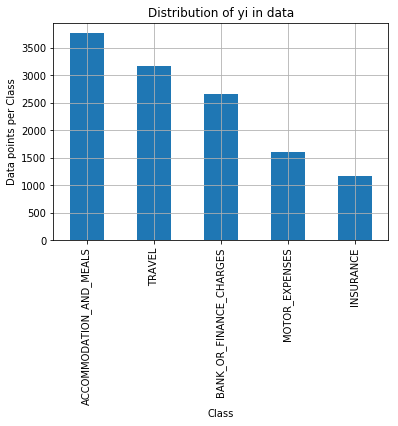

Number of data points in ACCOMMODATION_AND_MEALS : 3765 ( 30.439 %)
Number of data points in TRAVEL : 3166 ( 25.596 %)
Number of data points in BANK_OR_FINANCE_CHARGES : 2659 ( 21.497 %)
Number of data points in MOTOR_EXPENSES : 1609 ( 13.008 %)
Number of data points in INSURANCE : 1170 ( 9.459 %)


In [23]:
data_class_distribution = data['bank_transaction_category'].value_counts()
data_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in data')
plt.grid()
plt.show()


sorted_yi = np.argsort(-data_class_distribution.values)
for i in sorted_yi:
    print( 'Number of data points in',data_class_distribution.index[i] , ':',data_class_distribution.values[i], '(', np.round((data_class_distribution.values[i]/data.shape[0]*100), 3), '%)')

* It can be seen that top three majority classes are Accommodation  and Meals(30.439%), Travel (25.596%) and Bank or Finance charges(21.497%). 
  While the minority classes are Motor expenses(13.008%)  and Insurance(9.459%). 
* Based on this,it can be deducted that the datset is  somewhat   imbalanced so might need to use some data resampling   techniques.

bank_transaction_category  ACCOMMODATION_AND_MEALS  BANK_OR_FINANCE_CHARGES  \
bank_transaction_type                                                         
CHG                                              0                     2394   
CSH                                           1112                        0   
DD                                               0                        0   
DEB                                           1941                        0   
FPO                                            398                      143   
MPO                                            314                      122   
All                                           3765                     2659   

bank_transaction_category  INSURANCE  MOTOR_EXPENSES  TRAVEL    All  
bank_transaction_type                                                
CHG                                0               0       0   2394  
CSH                                0             261     668   2041  
DD      

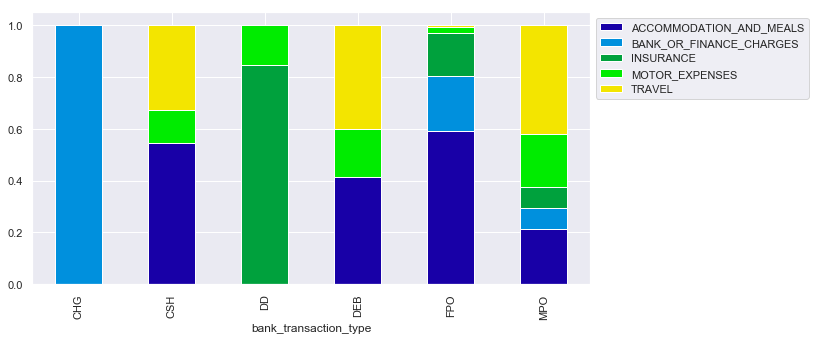

In [24]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x,flag=True):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['bank_transaction_category'],margins=True)
    if flag==True:
        print(tab1)
        print('-'*120)
    tab = pd.crosstab(x,data['bank_transaction_category'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()
stacked_plot(data.bank_transaction_type)

The majority class with 100% is CHG category of Bank or Finance Charges, 59% of FPO(Faster Payment) transactions comes under category of Accomdation and Meals,85% of DD(Demand Draft) comes under Insurance,42% of MPO(Mobile Payment) comes under Travel, 18%  of DEB(Debit card) and MPO  fall under  Motor Expenses.



bank_transaction_category  ACCOMMODATION_AND_MEALS  BANK_OR_FINANCE_CHARGES  \
bank_transaction_dataset                                                      
TRAIN                                         3017                     2141   
VAL                                            748                      518   
All                                           3765                     2659   

bank_transaction_category  INSURANCE  MOTOR_EXPENSES  TRAVEL    All  
bank_transaction_dataset                                             
TRAIN                            920            1235    2578   9891  
VAL                              250             374     588   2478  
All                             1170            1609    3166  12369  
------------------------------------------------------------------------------------------------------------------------


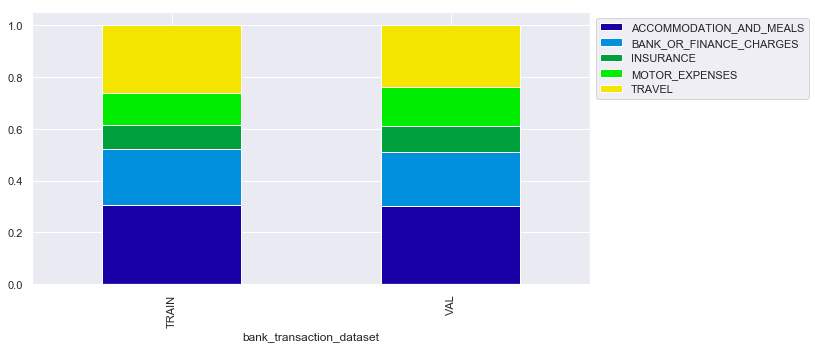

In [25]:
stacked_plot(data.bank_transaction_dataset)

very little difference is observed for Accommodation and meals and Motor expenses.



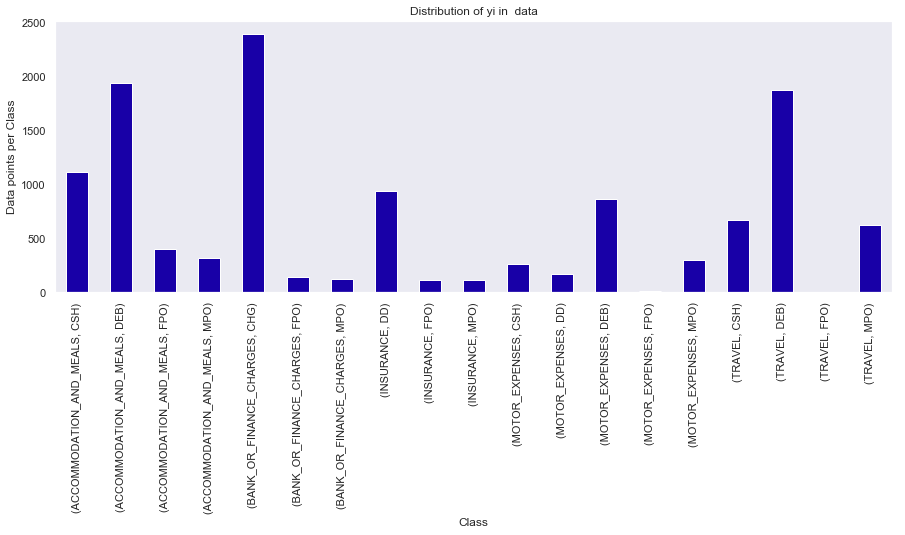

In [26]:
data_class_distribution_2 = data.groupby(["bank_transaction_category", "bank_transaction_type"]).size()
data_class_distribution_2.plot(kind='bar', figsize=(15,5) )
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in  data')
plt.grid()
plt.show()

* Based on above plot that most of the customers do Debit card transactions on Accommodation and Meals and Travel. Some customers pay through cash for Accommodation and Meals. 
* Most of the Insurance transactions are done through Demand Draft.
* Majority of the class is CHG where bank is charging customers for the transactions . 



##Dividing the data into train and test set

In [27]:
data

,bank_transaction_id,bank_transaction_category,bank_transaction_dataset,bank_transaction_description,bank_transaction_amount,bank_transaction_type
0,21786195,TRAVEL,TRAIN,citylink,-13.80,MPO
1,21786196,TRAVEL,TRAIN,citylink,-13.14,DEB
2,21786197,TRAVEL,TRAIN,1Jul19 OYSTER,-36.98,DEB
3,21786198,TRAVEL,TRAIN,travelodge,-75.73,MPO
4,21786199,TRAVEL,TRAIN,6Jul19 RINGGO,-37.86,CSH
5,21786200,TRAVEL,TRAIN,SUNDRY DEBIT CONTACTLESS CAMDEN PARKING,-34.79,DEB
6,21786201,TRAVEL,TRAIN,stgcoach,-7.26,DEB
7,21786202,TRAVEL,TRAIN,trainline,-26.71,DEB
8,21786203,TRAVEL,TRAIN,Fin: CMT UK LTD Cash at Transact,-36.25,CSH
9,21786204,TRAVEL,TRAIN,OYSTER,-21.80,DEB


In [28]:
data['description']=df    
train_x = data[data.bank_transaction_dataset == 'TRAIN']


train_x1=train_x['description']  
train_y=train_x['bank_transaction_category']

test_x = data[data.bank_transaction_dataset == 'VAL']

test_x.head()
test_x1=test_x['description']
test_y=test_x['bank_transaction_category']

In [29]:
train_x1

0                                                citylink
1                                                citylink
2                                           1jul19 oyster
3                                              travelodge
4                                           6jul19 ringgo
5                 sundry debit contactless camden parking
6                                                stgcoach
7                                               trainline
8                       fin: cmt uk ltd  cash at transact
9                                                  oyster
10                    travelodge contactless on 2019-8-25
11                                    fin: 5aug19 tfl.gov
12                                    11aug19  stagecoach
13                                sundry debit   halfords
14                                        28jul19 tfl.gov
15                      fin: transport for london 14aug19
16       sundry debit  card payment great western railway
17            

In [30]:
train_y

0          TRAVEL
1          TRAVEL
2          TRAVEL
3          TRAVEL
4          TRAVEL
5          TRAVEL
6          TRAVEL
7          TRAVEL
8          TRAVEL
9          TRAVEL
10         TRAVEL
11         TRAVEL
12         TRAVEL
13         TRAVEL
14         TRAVEL
15         TRAVEL
16         TRAVEL
17         TRAVEL
18         TRAVEL
19         TRAVEL
20         TRAVEL
21         TRAVEL
22         TRAVEL
23         TRAVEL
24         TRAVEL
25         TRAVEL
26         TRAVEL
27         TRAVEL
28         TRAVEL
29         TRAVEL
          ...    
9970    INSURANCE
9971    INSURANCE
9972    INSURANCE
9973    INSURANCE
9974    INSURANCE
9975    INSURANCE
9976    INSURANCE
9977    INSURANCE
9978    INSURANCE
9979    INSURANCE
9980    INSURANCE
9981    INSURANCE
9982    INSURANCE
9983    INSURANCE
9984    INSURANCE
9985    INSURANCE
9986    INSURANCE
9987    INSURANCE
9988    INSURANCE
9989    INSURANCE
9990    INSURANCE
9991    INSURANCE
9992    INSURANCE
9993    INSURANCE
9994    IN

In [31]:
print('Number of data points in train data:', train_x1.shape[0])
print('Number of data points in test data:', test_x.shape[0])


Number of data points in train data: 9891
Number of data points in test data: 2478


##Feature Engineering

 Using Tfidf

In [32]:
tfidfvectorizer = TfidfVectorizer(analyzer='word' , stop_words='english',)
tfidfvectorizer.fit(train_x1)
train_x1 = tfidfvectorizer.transform(train_x1)
test_x1  = tfidfvectorizer.transform(test_x1)

In [33]:
train_x1

<9891x356 sparse matrix of type '<class 'numpy.float64'>'
	with 35435 stored elements in Compressed Sparse Row format>

#Model building

Using Logistic Regression

In [34]:
test_x1

<2478x356 sparse matrix of type '<class 'numpy.float64'>'
	with 9035 stored elements in Compressed Sparse Row format>

In [35]:
model = LogisticRegression(multi_class='multinomial',solver = 'lbfgs').fit(train_x1, train_y)
score = model.score(test_x1, test_y)


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Model Evaluation

In [36]:
score

0.9245359160613398

Confusion Matrix

In [37]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
            
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

[[713   0   0   0  35]
 [  1 505   0   0  12]
 [  1   1 241   4   3]
 [ 18   4  20 315  17]
 [ 26  12   0  33 517]]


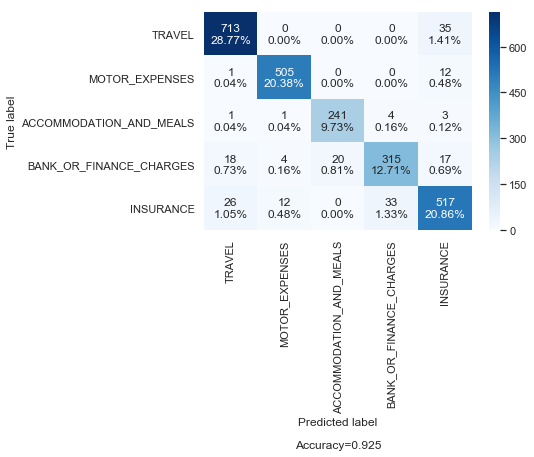

In [38]:

y_test_pred = model.predict(test_x1)
cm=confusion_matrix(test_y, y_test_pred)
print(cm)
labels = ['True label','Predicted label']
categories = [ 'TRAVEL', 'MOTOR_EXPENSES', 'ACCOMMODATION_AND_MEALS',
       'BANK_OR_FINANCE_CHARGES', 'INSURANCE']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

The model has misclassified for the following categories:
* The true value of Bank_Or_Finance_Charges predicted as Accommodation_And_Meals
* True value of Insurance it is predicting as Bank_Or_Finance_Charges
* And for Travel it is predicting as Insurance.


Calculating Precision,Recall,F1 score

In [39]:
print(metrics.classification_report(test_y, y_test_pred))

                         precision    recall  f1-score   support

ACCOMMODATION_AND_MEALS       0.94      0.95      0.95       748
BANK_OR_FINANCE_CHARGES       0.97      0.97      0.97       518
              INSURANCE       0.92      0.96      0.94       250
         MOTOR_EXPENSES       0.89      0.84      0.87       374
                 TRAVEL       0.89      0.88      0.88       588

              micro avg       0.92      0.92      0.92      2478
              macro avg       0.92      0.92      0.92      2478
           weighted avg       0.92      0.92      0.92      2478



Using MultiNomial Navie Bayes

In [40]:
model1 = MultinomialNB()
model1.fit(train_x1, train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

##Model evalaution

In [41]:
print(model1.score(test_x1, test_y))

0.9096045197740112


##Plotting confusion matrix

In [42]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
            
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

[[710   0   1   0  37]
 [ 17 494   0   0   7]
 [  4   1 231  14   0]
 [ 18   5  27 300  24]
 [ 17  12   0  40 519]]


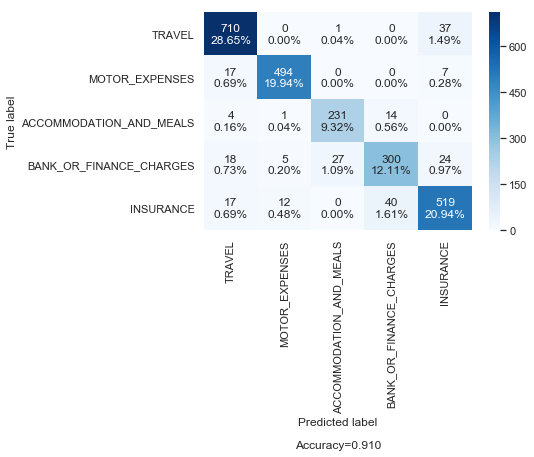

In [43]:

y_test_pred = model1.predict(test_x1)
cm=confusion_matrix(test_y, y_test_pred)
print(cm)
labels = ['True label','Predicted label']
categories = [ 'TRAVEL', 'MOTOR_EXPENSES', 'ACCOMMODATION_AND_MEALS',
       'BANK_OR_FINANCE_CHARGES', 'INSURANCE']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Calculating Precision,Recall,F1 score

In [44]:
print(metrics.classification_report(test_y, y_test_pred))


                         precision    recall  f1-score   support

ACCOMMODATION_AND_MEALS       0.93      0.95      0.94       748
BANK_OR_FINANCE_CHARGES       0.96      0.95      0.96       518
              INSURANCE       0.89      0.92      0.91       250
         MOTOR_EXPENSES       0.85      0.80      0.82       374
                 TRAVEL       0.88      0.88      0.88       588

              micro avg       0.91      0.91      0.91      2478
              macro avg       0.90      0.90      0.90      2478
           weighted avg       0.91      0.91      0.91      2478



Business Recommendation

* Based on EDA analysis, majority of Accommodation and Meals as well as Travel transactions are done using Debit cards.  Incase, the objective is to increase bank revenue, providing more offers on Accommodation and Meals  and Travel will be beneficial, while this would also increase the bank transaction charges CHG thereby increasing the revenue of the bank.
